In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import os
import scipy.io
from scipy import stats

In [2]:
# Import data from mat-file

data = scipy.io.loadmat('SING_cellmeans_Ctrl.mat')
SING_cellmeans_Ctrl = (data['cellmeans'])
data = scipy.io.loadmat('SING_cellmeans_shakB2.mat')
SING_cellmeans_shakB2 = (data['cellmeans'])
data = scipy.io.loadmat('SING_cellmeans_shakB_RNAi.mat')
SING_cellmeans_shakB_RNAi = (data['cellmeans'])

In [3]:
dir = np.array([0, 45, 90, 135, 180, 225, 270, 315, 360])

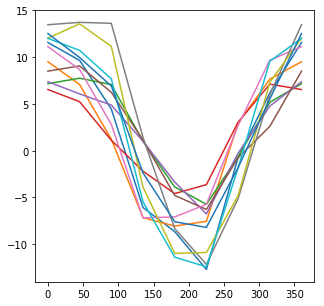

In [4]:
fig = plt.figure(figsize = (5,5))
plt.plot(dir, np.transpose(SING_cellmeans_Ctrl))

In [7]:
# Calculate Direction Selectivity Index (DSI) for shakB2 (DSI= PD - ND)

MaxDir_shakB2=np.zeros([2,len(SING_cellmeans_shakB2)])

for i in range(len(SING_cellmeans_shakB2)):
    MaxDir_shakB2[0,i]=dir[np.argmax(SING_cellmeans_shakB2,1)[i]]
    MaxDir_shakB2[1,i]=(MaxDir_shakB2[0,i]+180)%360

PDND_shakB2=np.zeros([2,len(SING_cellmeans_shakB2)])

for i in range(len(SING_cellmeans_shakB2)):
    PDND_shakB2[0,i]=SING_cellmeans_shakB2[i,np.where(dir==MaxDir_shakB2[0,i])]
    PDND_shakB2[1,i]=SING_cellmeans_shakB2[i,np.where(dir==MaxDir_shakB2[1,i])]
    
DSI_shakB2=(PDND_shakB2[0,:]-PDND_shakB2[1,:])


# Calculate Direction Selectivity Index (DSI) for shakB2 (DSI= PD - ND)

MaxDir_shakB2=np.zeros([2,len(SING_cellmeans_shakB2)])

for i in range(len(SING_cellmeans_shakB2)):
    MaxDir_shakB2[0,i]=dir[np.argmax(SING_cellmeans_shakB2,1)[i]]
    MaxDir_shakB2[1,i]=(MaxDir_shakB2[0,i]+180)%360

PDND_shakB2=np.zeros([2,len(SING_cellmeans_shakB2)])

for i in range(len(SING_cellmeans_shakB2)):
    PDND_shakB2[0,i]=SING_cellmeans_shakB2[i,np.where(dir==MaxDir_shakB2[0,i])]
    PDND_shakB2[1,i]=SING_cellmeans_shakB2[i,np.where(dir==MaxDir_shakB2[1,i])]
    
DSI_shakB2=(PDND_shakB2[0,:]-PDND_shakB2[1,:])

In [13]:
# Calculate Direction Selectivity Index (DSI) for Controls (DSI= PD - ND)

MaxDir_Ctrl=np.zeros([2,len(SING_cellmeans_Ctrl)])

for i in range(len(SING_cellmeans_Ctrl)):
    MaxDir_Ctrl[0,i]=dir[np.argmax(SING_cellmeans_Ctrl,1)[i]]
    MaxDir_Ctrl[1,i]=(MaxDir_Ctrl[0,i]+180)%360

PDND_Ctrl=np.zeros([2,len(SING_cellmeans_Ctrl)])

for i in range(len(SING_cellmeans_Ctrl)):
    PDND_Ctrl[0,i]=SING_cellmeans_Ctrl[i,np.where(dir==MaxDir_Ctrl[0,i])]
    PDND_Ctrl[1,i]=SING_cellmeans_Ctrl[i,np.where(dir==MaxDir_Ctrl[1,i])]
    
DSI_Ctrl=(PDND_Ctrl[0,:]-PDND_Ctrl[1,:])


# Calculate Direction Selectivity Index (DSI) for shakB_RNAi (DSI= PD - ND)

MaxDir_shakB_RNAi=np.zeros([2,len(SING_cellmeans_shakB_RNAi)])

for i in range(len(SING_cellmeans_shakB_RNAi)):
    MaxDir_shakB_RNAi[0,i]=dir[np.argmax(SING_cellmeans_shakB_RNAi,1)[i]]
    MaxDir_shakB_RNAi[1,i]=(MaxDir_shakB_RNAi[0,i]+180)%360

PDND_shakB_RNAi=np.zeros([2,len(SING_cellmeans_shakB_RNAi)])

for i in range(len(SING_cellmeans_shakB_RNAi)):
    PDND_shakB_RNAi[0,i]=SING_cellmeans_shakB_RNAi[i,np.where(dir==MaxDir_shakB_RNAi[0,i])]
    PDND_shakB_RNAi[1,i]=SING_cellmeans_shakB_RNAi[i,np.where(dir==MaxDir_shakB_RNAi[1,i])]
    
DSI_shakB_RNAi=(PDND_shakB_RNAi[0,:]-PDND_shakB_RNAi[1,:])

In [14]:
DSI_shakB_RNAi

array([ 4.56323576,  6.74632647, 10.32962909, 14.31241696])

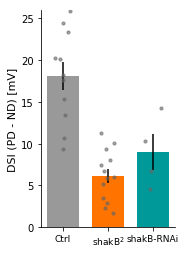

In [15]:
# Make Figure for SING DSI

fig = plt.figure(figsize = (6,4))
plt.subplots_adjust(wspace=0.5)
w=0.7
ax = fig.add_subplot(121)
ax.bar(0,height=[np.mean(DSI_Ctrl)],width=w,color='0.6',yerr=[stats.sem(DSI_Ctrl)])
ax.bar(1,height=[np.mean(DSI_shakB2)],width=w,color='#FF7400',yerr=[stats.sem(DSI_shakB2)])
ax.bar(2,height=[np.mean(DSI_shakB_RNAi)],width=w,color='#009999',yerr=[stats.sem(DSI_shakB_RNAi)])
ax.axhline(y=0, color='0.4', linewidth='1')

for i in range(len(DSI_Ctrl)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,DSI_Ctrl[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(DSI_shakB2)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,DSI_shakB2[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(DSI_shakB_RNAi)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,DSI_shakB_RNAi[i], s=10, color='0.4', alpha=0.6, zorder = 2)      


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('DSI (PD - ND) [mV]', size=11)
ax.set_xticks([0,1,2])
ax.set_xticklabels(('Ctrl','shakB$^2$','shakB-RNAi'), size=9)
plt.ylim([0,26])

plt.savefig('SING_DSI_barplot.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [16]:
stats.ttest_ind(DSI_Ctrl, DSI_shakB_RNAi, axis=0, equal_var=False)

Ttest_indResult(statistic=3.361024007993446, pvalue=0.012363354393816244)

In [17]:
SING_cellmeans_Ctrl[:,0]

array([11.5566197 ,  9.50574487,  7.15777877,  6.5293728 ,  7.37058735,
        8.49507343, 11.11060693, 13.45474552, 12.01841957, 12.00053079,
       12.51101695])

In [18]:
len(stats.sem(SING_cellmeans_Ctrl, axis=0))

9

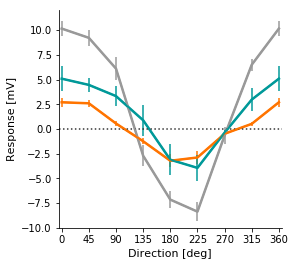

In [30]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

plt.plot(dir, np.mean(SING_cellmeans_Ctrl, axis=0),
             color = '0.6', linewidth='2.5')
plt.errorbar(dir, np.mean(SING_cellmeans_Ctrl, axis=0), yerr=stats.sem(SING_cellmeans_Ctrl, axis=0),
             color = '0.6')
plt.plot(dir, np.mean(SING_cellmeans_shakB2, axis=0),
             color = '#FF7400', linewidth='2.5')
plt.errorbar(dir, np.mean(SING_cellmeans_shakB2, axis=0), yerr=stats.sem(SING_cellmeans_shakB2, axis=0),
             color = '#FF7400')
plt.plot(dir, np.mean(SING_cellmeans_shakB_RNAi, axis=0),
             color = '#009999', linewidth='2.5')
plt.errorbar(dir, np.mean(SING_cellmeans_shakB_RNAi, axis=0), yerr=stats.sem(SING_cellmeans_shakB_RNAi, axis=0),
             color = '#009999')

ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Response [mV]', size=11)
ax.set_xlabel('Direction [deg]', size=11)
ax.set_xticks(dir)
plt.xlim([-5,365])
plt.ylim([-10,12])

plt.savefig('SING_Dirtuning.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [ ]:
# Do the same for HS cells

In [20]:
# Import data from mat-file

data = scipy.io.loadmat('SING_cellmeans_Ctrl_HS.mat')
SING_cellmeans_Ctrl_HS = (data['cellmeans'])
data = scipy.io.loadmat('SING_cellmeans_shakB2_HS.mat')
SING_cellmeans_shakB2_HS = (data['cellmeans'])
data = scipy.io.loadmat('SING_cellmeans_shakB_RNAi_HS.mat')
SING_cellmeans_shakB_RNAi_HS = (data['cellmeans'])

In [26]:
# Calculate Direction Selectivity Index (DSI) for shakB2_HS HS cells(DSI= PD - ND)

MaxDir_shakB2_HS=np.zeros([2,len(SING_cellmeans_shakB2_HS)])

for i in range(len(SING_cellmeans_shakB2_HS)):
    MaxDir_shakB2_HS[0,i]=dir[np.argmax(SING_cellmeans_shakB2_HS,1)[i]]
    MaxDir_shakB2_HS[1,i]=(MaxDir_shakB2_HS[0,i]+180)%360

PDND_shakB2_HS=np.zeros([2,len(SING_cellmeans_shakB2_HS)])

for i in range(len(SING_cellmeans_shakB2_HS)):
    PDND_shakB2_HS[0,i]=SING_cellmeans_shakB2_HS[i,np.where(dir==MaxDir_shakB2_HS[0,i])]
    PDND_shakB2_HS[1,i]=SING_cellmeans_shakB2_HS[i,np.where(dir==MaxDir_shakB2_HS[1,i])]
    
DSI_shakB2_HS=(PDND_shakB2_HS[0,:]-PDND_shakB2_HS[1,:])


# Calculate Direction Selectivity Index (DSI) for shakB2_HS (DSI= PD - ND)

MaxDir_shakB2_HS=np.zeros([2,len(SING_cellmeans_shakB2_HS)])

for i in range(len(SING_cellmeans_shakB2_HS)):
    MaxDir_shakB2_HS[0,i]=dir[np.argmax(SING_cellmeans_shakB2_HS,1)[i]]
    MaxDir_shakB2_HS[1,i]=(MaxDir_shakB2_HS[0,i]+180)%360

PDND_shakB2_HS=np.zeros([2,len(SING_cellmeans_shakB2_HS)])

for i in range(len(SING_cellmeans_shakB2_HS)):
    PDND_shakB2_HS[0,i]=SING_cellmeans_shakB2_HS[i,np.where(dir==MaxDir_shakB2_HS[0,i])]
    PDND_shakB2_HS[1,i]=SING_cellmeans_shakB2_HS[i,np.where(dir==MaxDir_shakB2_HS[1,i])]
    
DSI_shakB2_HS=(PDND_shakB2_HS[0,:]-PDND_shakB2_HS[1,:])

# Calculate Direction Selectivity Index (DSI) for Controls (DSI= PD - ND)

MaxDir_Ctrl_HS=np.zeros([2,len(SING_cellmeans_Ctrl_HS)])

for i in range(len(SING_cellmeans_Ctrl_HS)):
    MaxDir_Ctrl_HS[0,i]=dir[np.argmax(SING_cellmeans_Ctrl_HS,1)[i]]
    MaxDir_Ctrl_HS[1,i]=(MaxDir_Ctrl_HS[0,i]+180)%360

PDND_Ctrl_HS=np.zeros([2,len(SING_cellmeans_Ctrl_HS)])

for i in range(len(SING_cellmeans_Ctrl_HS)):
    PDND_Ctrl_HS[0,i]=SING_cellmeans_Ctrl_HS[i,np.where(dir==MaxDir_Ctrl_HS[0,i])]
    PDND_Ctrl_HS[1,i]=SING_cellmeans_Ctrl_HS[i,np.where(dir==MaxDir_Ctrl_HS[1,i])]
    
DSI_Ctrl_HS=(PDND_Ctrl_HS[0,:]-PDND_Ctrl_HS[1,:])


# Calculate Direction Selectivity Index (DSI) for shakB_RNAi_HS (DSI= PD - ND)

MaxDir_shakB_RNAi_HS=np.zeros([2,len(SING_cellmeans_shakB_RNAi_HS)])

for i in range(len(SING_cellmeans_shakB_RNAi_HS)):
    MaxDir_shakB_RNAi_HS[0,i]=dir[np.argmax(SING_cellmeans_shakB_RNAi_HS,1)[i]]
    MaxDir_shakB_RNAi_HS[1,i]=(MaxDir_shakB_RNAi_HS[0,i]+180)%360

PDND_shakB_RNAi_HS=np.zeros([2,len(SING_cellmeans_shakB_RNAi_HS)])

for i in range(len(SING_cellmeans_shakB_RNAi_HS)):
    PDND_shakB_RNAi_HS[0,i]=SING_cellmeans_shakB_RNAi_HS[i,np.where(dir==MaxDir_shakB_RNAi_HS[0,i])]
    PDND_shakB_RNAi_HS[1,i]=SING_cellmeans_shakB_RNAi_HS[i,np.where(dir==MaxDir_shakB_RNAi_HS[1,i])]
    
DSI_shakB_RNAi_HS=(PDND_shakB_RNAi_HS[0,:]-PDND_shakB_RNAi_HS[1,:])

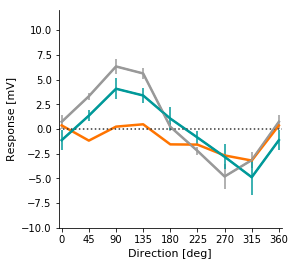

In [29]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(111)

plt.plot(dir, np.mean(SING_cellmeans_Ctrl_HS, axis=0),
             color = '0.6', linewidth='2.5')
plt.errorbar(dir, np.mean(SING_cellmeans_Ctrl_HS, axis=0), yerr=stats.sem(SING_cellmeans_Ctrl_HS, axis=0),
             color = '0.6')
plt.plot(dir, np.mean(SING_cellmeans_shakB2_HS, axis=0),
             color = '#FF7400', linewidth='2.5')
#plt.errorbar(dir, np.mean(SING_cellmeans_shakB2_HS, axis=0), yerr=stats.sem(SING_cellmeans_shakB2_HS, axis=0),
            # color = '#FF7400')
plt.plot(dir, np.mean(SING_cellmeans_shakB_RNAi_HS, axis=0),
             color = '#009999', linewidth='2.5')
plt.errorbar(dir, np.mean(SING_cellmeans_shakB_RNAi_HS, axis=0), yerr=stats.sem(SING_cellmeans_shakB_RNAi_HS, axis=0),
             color = '#009999')

ax.axhline(y=0, color='0.2', linestyle=':')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Response [mV]', size=11)
ax.set_xlabel('Direction [deg]', size=11)
ax.set_xticks(dir)
plt.xlim([-5,365])
plt.ylim([-10,12])

plt.savefig('SING_Dirtuning_HS.pdf',bbox_inches='tight', format='pdf')
plt.show()

In [37]:
DSI_Ctrl_all = np.concatenate((DSI_Ctrl, DSI_Ctrl_HS))
DSI_shakB2_all = np.concatenate((DSI_shakB2, DSI_shakB2_HS))
DSI_shakB_RNAi_all = np.concatenate((DSI_shakB_RNAi, DSI_shakB_RNAi_HS))

In [39]:
DSI_shakB_RNAi_all

array([ 4.56323576,  6.74632647, 10.32962909, 14.31241696,  6.84904968,
        7.91339841,  5.76575273, 11.02296427])

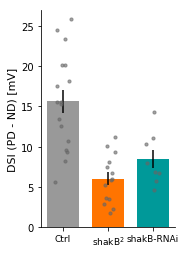

In [42]:
# Make Figure for SING DSI

fig = plt.figure(figsize = (6,4))
plt.subplots_adjust(wspace=0.5)
w=0.7
ax = fig.add_subplot(121)
ax.bar(0,height=[np.mean(DSI_Ctrl_all)],width=w,color='0.6',yerr=[stats.sem(DSI_Ctrl_all)])
ax.bar(1,height=[np.mean(DSI_shakB2_all)],width=w,color='#FF7400',yerr=[stats.sem(DSI_shakB2_all)])
ax.bar(2,height=[np.mean(DSI_shakB_RNAi_all)],width=w,color='#009999',yerr=[stats.sem(DSI_shakB_RNAi_all)])
ax.axhline(y=0, color='0.4', linewidth='1')

for i in range(len(DSI_Ctrl_all)):
    ax.scatter(0 + np.random.random(1) * w/2 - w/4,DSI_Ctrl_all[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(DSI_shakB2_all)):
    ax.scatter(1 + np.random.random(1) * w/2 - w/4,DSI_shakB2_all[i], s=10, color='0.4', alpha=0.6, zorder = 2)
for i in range(len(DSI_shakB_RNAi_all)):
    ax.scatter(2 + np.random.random(1) * w/2 - w/4,DSI_shakB_RNAi_all[i], s=10, color='0.4', alpha=0.6, zorder = 2)      


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('DSI (PD - ND) [mV]', size=11)
ax.set_xticks([0,1,2])
ax.set_xticklabels(('Ctrl','shakB$^2$','shakB-RNAi'), size=9)
plt.ylim([0,27])

plt.savefig('SING_DSI_barplot_all.pdf',bbox_inches='tight', format='pdf')
plt.show()